In [1]:
cd("../.") 
pwd()

"/Users/farhadyar/Documents/Project_PTVAE/progs/github_repo/PTVAE"

In [2]:
using Pkg
if isfile("Project.toml") && isfile("Manifest.toml")
    Pkg.activate(".")
end

# Pkg.instantiate()
using IJulia

using Revise




  Activating environment at `~/Documents/Project_PTVAE/progs/github_repo/PTVAE/Project.toml`


In [3]:
includet("AIQN/AIQN.jl")
includet("src/structs.jl")
includet("src/report.jl")
includet("src/transformations.jl")
includet("src/VAE.jl")
includet("src/load_data.jl")
includet("src/evaluation/evaluation.jl")
includet("src/classification.jl")
includet("src/GLM.jl")

    Building Conda ─→ `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/e32a90da027ca45d84678b826fffd3110bb3fc90/build.log`
    Building PyCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/62f417f6ad727987c755549e9cd88c46578da562/build.log`


## loading the IST data

In [4]:
x = Matrix(CSV.read("./data/ist_randomization_data_smaller_no_west_no_south_aug5.csv" , DataFrame))[:,1:end-2]
data_string = "ist_randomization_data_smaller_no_west_no_south_aug5"

"ist_randomization_data_smaller_no_west_no_south_aug5"

### Boxplots of real data

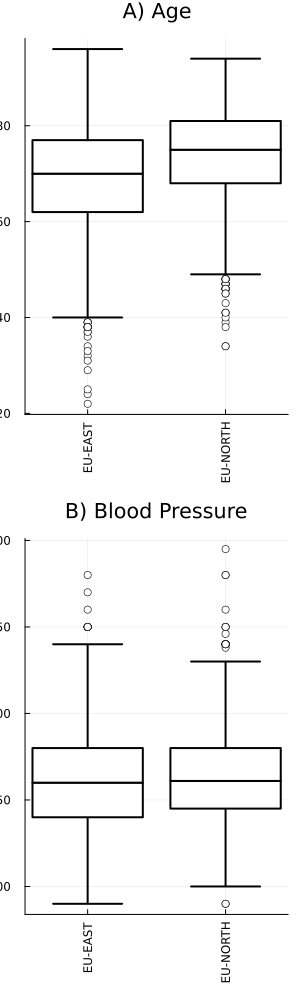

In [5]:
boxplot_rdelay = Plots.boxplot(load_region(data_string), x[:,3], xrotation = 90, title = "A) RDELAY", size = (200,400), whisker_width=0.5,  color = "white", width = 2, legend = false)
# Plots.savefig("./figures/rdelay_boxplot$(Dates.format(now(), "yyyy-mm-dd-HH")).png")

boxplot_age = Plots.boxplot(load_region(data_string), x[:,5],xrotation = 90,  title = "A) Age",  size = (200,400), whisker_width=0.5, legend = false, color = "white", width = 2)
# Plots.savefig("./figures/age_boxplot$(Dates.format(now(), "yyyy-mm-dd-HH")).png")

boxplot_bp = Plots.boxplot(load_region(data_string), x[:,12], xrotation = 90, title = "B) Blood Pressure",  size = (200,400), whisker_width=0.5, legend = false, color = "white", width = 2)
# Plots.savefig("./figures/bp_boxplot$(Dates.format(now(), "yyyy-mm-dd-HH")).png")

# plt_boxplots = Plots.plot(boxplot_rdelay, boxplot_age, boxplot_bp, layout = (3,1), size = (300,1000), legend = false)
plt_boxplots = Plots.plot(boxplot_age, boxplot_bp, layout = (2,1), size = (300,1000), legend = false)

### comparing the density plots of generated data using weighted sampling method and standard sampling method

In [7]:
dim_number = 5
dim_name = "Age"

syn_standard = Matrix(CSV.read("./runs/run_403/vae/prior_sampling/synthetic_data_prior.csv", DataFrame, header = false))
syn = Matrix(CSV.read("./runs/run_404/vae/prior_sampling/synthetic_data_prior.csv", DataFrame, header = false))


plt = Plots.density(x[:,dim_number], label = "Orig both", color = "black", width = 3)

plt1 = Plots.density!(x[load_region(data_string) .=="EU-NORTH",dim_number], label = "Orig EU-NORTH", color = "#1D4A91", width = 3)

plt2 = Plots.density!(x[load_region(data_string) .=="EU-EAST",dim_number], label = "Orig EU-EAST", color = "gray", width = 3)

plt3 = Plots.density!(syn_standard[:,dim_number], label = "Syn (standard_sampling)", color = "green", width = 3, linestyle = :dash, xlabel = dim_name)


plt_age = Plots.density!(syn[:,dim_number], label = "Syn (weighted_sampling)",linestyle = :dot, color = "#AE232F", width = 3, legendfont = 6, legend = :topleft, size = (300,400))

# Plots.savefig("./figures/age_density$(Dates.format(now(), "yyyy-mm-dd-HH")).png")

dim_number = 3
dim_name = "RDELAY"

plt = Plots.density(x[:,dim_number], label = "Orig both", color = "black", width = 3)

plt1 = Plots.density!(x[load_region(data_string) .=="EU-NORTH",dim_number], label = "Orig EU-NORTH", color = "#1D4A91", width = 3)

plt2 = Plots.density!(x[load_region(data_string) .=="EU-EAST",dim_number], label = "Orig EU-EAST", color = "gray", width = 3)

plt3 = Plots.density!(syn_standard[:,dim_number], label = "Syn (standard_sampling)", color = "green", width = 3, linestyle = :dash, xlabel = dim_name)

plt_rdelay = Plots.density!(syn[:,dim_number], label = "Syn (weighted_sampling)",linestyle = :dot, color = "#AE232F", width = 3,  legendfont = 6, legend = false, size = (300,400))

# Plots.savefig("./figures/rdelay_density$(Dates.format(now(), "yyyy-mm-dd-HH")).png")

dim_number = 12
dim_name = "Blood Pressure"

plt = Plots.density(x[:,dim_number], label = "Orig both", color = "black", width = 3)

plt1 = Plots.density!(x[load_region(data_string) .=="EU-NORTH",dim_number], label = "Orig EU-NORTH", color = "#1D4A91", width = 3)

plt2 = Plots.density!(x[load_region(data_string) .=="EU-EAST",dim_number], label = "Orig EU-EAST", color = "gray", width = 3)

plt3 = Plots.density!(syn_standard[:,dim_number], label = "Syn (standard_sampling)", color = "green", width = 3, linestyle = :dash, xlabel = dim_name)

plt_bp = Plots.density!(syn[:,dim_number], label = "Syn (weighted_sampling)",linestyle = :dot, color = "#AE232F", width = 3, legend = false, legendfont = 6)

# Plots.savefig("./figures/bp_density$(Dates.format(now(), "yyyy-mm-dd-HH")).png")

# plt_densities = Plots.plot(plt_rdelay, plt_age, plt_bp, layout = (3,1), size = (800,1000))
plt_densities = Plots.plot( plt_age, plt_bp, layout = (2,1), size = (800,1000))

Plots.plot!(plt_boxplots, plt_densities, layout = Plots.grid(1, 2, widths=[0.3 ,0.7]), tickfontsize = 6, titlefontsize = 8, legendfontsize = 8, xguidefontsize = 6, size = (800,600))

Plots.savefig("./figures/propensity_ist_marginal$(Dates.format(now(), "yyyy-mm-dd-HH")).pdf")

"/Users/farhadyar/Documents/Project_PTVAE/progs/github_repo/PTVAE/figures/propensity_ist_marginal2023-11-30-01.pdf"